In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [87]:
dataimport = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Indexes/SP GLOBAL 100.csv')


dataimport['Date'] = pd.to_datetime(dataimport['Date'])
dataimport.set_index('Date', inplace=True)
data = dataimport.copy()

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-01-03,4486.5,85.50,3319.990,94.15,43.58,91.94,32.610,109.6951,51.63,...,27.46,114.85,465.55,9.713,43.408,21.5225,644.0,570.898,49.7697,143.0
1,2011-01-04,4502.0,85.04,3391.157,93.71,44.16,91.60,31.935,111.6754,51.47,...,27.73,114.15,492.90,9.670,43.643,20.9925,653.0,579.017,49.4283,143.2
2,2011-01-05,4476.5,84.66,3332.929,94.52,44.70,91.44,31.745,111.8554,50.76,...,27.70,113.00,499.25,9.618,44.995,21.1300,659.0,582.863,49.3429,142.5
3,2011-01-06,4437.0,84.57,3294.111,93.54,44.48,90.69,31.515,111.3754,50.62,...,27.28,114.00,496.90,9.777,45.834,20.9400,676.0,588.845,50.2819,142.9
4,2011-01-07,4426.5,83.70,3265.743,93.73,43.64,91.19,31.460,110.5953,50.50,...,27.07,113.35,492.50,9.857,45.775,20.8825,691.0,582.008,49.6986,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,2022-12-26,5808.0,333.25,3249.500,239.87,131.28,177.40,63.820,63.8241,212.45,...,165.59,303.50,478.90,18.868,61.350,116.2500,1823.0,1116.500,68.7300,366.8
3126,2022-12-27,5808.0,336.75,3249.500,243.14,131.74,179.63,64.210,64.6434,210.90,...,166.44,305.30,478.90,18.940,61.880,117.5600,1817.5,1116.500,68.7800,363.2
3127,2022-12-28,5818.0,335.40,3286.000,239.38,132.46,176.98,63.570,63.9646,210.10,...,164.60,303.80,480.40,18.928,61.330,114.9800,1819.0,1123.500,67.8000,362.4
3128,2022-12-29,5834.0,338.70,3254.500,240.20,133.22,178.32,63.950,65.3536,215.74,...,166.78,305.90,480.75,19.084,62.000,117.3500,1817.0,1134.000,68.5800,363.4


In [88]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [89]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-01-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3112,2022-12-27,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3113,2022-12-28,0,0,0,0,0,0,-1,0,0,...,0,0,0,1,0,0,0,0,0,0
3114,2022-12-29,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [91]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-01-21,30.165500,52.455610,31.685352,40.021152,62.632475,66.583255,28.397677,76.756187,46.287256,...,53.969601,61.958420,59.430987,66.482474,54.322422,28.887308,49.937796,39.892874,38.640493,78.450566
1,2011-01-24,42.825961,55.589637,35.867779,52.697477,59.090033,68.739042,39.799504,79.537750,53.982231,...,55.418102,66.155257,59.094295,67.635238,52.543357,33.547598,56.162030,33.815391,47.454965,82.785704
2,2011-01-25,38.671569,57.274642,32.723867,51.537356,57.155942,68.441856,36.132342,77.539405,58.667288,...,62.600262,54.768129,59.094295,62.473415,56.608057,36.295134,61.839243,45.344405,51.781389,83.670155
3,2011-01-26,48.886698,63.328255,41.447933,58.899604,58.235524,72.081505,36.132342,75.496129,64.781221,...,58.426388,51.367459,52.948246,57.880318,61.996367,48.067237,52.348189,55.030063,52.219848,83.670155
4,2011-01-27,50.027559,51.820054,40.568212,62.833996,59.436338,72.746413,32.973273,79.060946,65.362039,...,67.702679,55.530508,47.615140,58.409546,59.228597,39.446218,56.747575,64.093098,55.956135,84.368724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,63.745097,41.304319,55.890981,61.113511,49.229222,53.690053,59.649645,49.117328,47.942676,...,44.999700,58.053988,53.623862,41.380040,45.303259,63.478099,29.421164,67.026427,52.865998,42.557008
3112,2022-12-27,63.745097,45.001572,55.890981,64.485854,50.711842,56.833749,62.450510,52.456166,45.736172,...,47.232571,60.378880,53.623862,44.109556,48.099082,65.097848,28.815431,67.026427,53.109768,38.992676
3113,2022-12-28,64.211144,43.854122,58.443937,58.232367,53.024170,52.290998,55.626683,49.554849,44.595357,...,43.148891,57.517876,54.669117,43.743968,45.499937,59.500902,29.243292,68.122497,47.882627,38.226473
3114,2022-12-29,64.986679,47.385746,55.460597,59.162464,55.402559,54.280998,58.524506,55.035290,53.417121,...,48.797302,60.350469,54.924405,49.592928,49.107736,62.675521,28.993065,69.746987,51.937260,39.818385


In [92]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-01-21,4243.0,84.72,3076.627,92.75,45.29,93.78,31.380,118.4564,50.52,...,27.60,115.45,497.30,9.940,45.985,20.5750,674.0,568.334,49.0726,148.0
1,2011-01-24,4347.5,85.17,3111.464,94.57,45.02,94.10,31.625,120.2566,51.01,...,27.66,116.25,497.00,9.966,45.767,20.6650,683.0,559.360,49.7840,149.6
2,2011-01-25,4290.0,85.42,3060.701,94.39,44.87,94.08,31.480,119.8966,51.37,...,28.00,114.85,497.00,9.908,46.346,20.7200,693.0,570.898,50.1966,150.0
3,2011-01-26,4400.0,86.43,3140.827,95.75,44.98,94.64,31.480,119.5365,51.94,...,27.86,114.35,491.70,9.852,47.236,21.0000,680.0,584.145,50.2393,150.0
4,2011-01-27,4414.0,84.96,3128.385,96.63,45.10,94.75,31.350,121.6968,52.00,...,28.42,115.05,486.40,9.861,46.925,20.6925,688.0,601.665,50.6092,150.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,5808.0,333.25,3249.500,239.87,131.28,177.40,63.820,63.8241,212.45,...,165.59,303.50,478.90,18.868,61.350,116.2500,1823.0,1116.500,68.7300,366.8
3112,2022-12-27,5808.0,336.75,3249.500,243.14,131.74,179.63,64.210,64.6434,210.90,...,166.44,305.30,478.90,18.940,61.880,117.5600,1817.5,1116.500,68.7800,363.2
3113,2022-12-28,5818.0,335.40,3286.000,239.38,132.46,176.98,63.570,63.9646,210.10,...,164.60,303.80,480.40,18.928,61.330,114.9800,1819.0,1123.500,67.8000,362.4
3114,2022-12-29,5834.0,338.70,3254.500,240.20,133.22,178.32,63.950,65.3536,215.74,...,166.78,305.90,480.75,19.084,62.000,117.3500,1817.0,1134.000,68.5800,363.4


In [93]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

    

In [94]:
returns,intrade = get_returns(master_macd, master_rsi, prices)

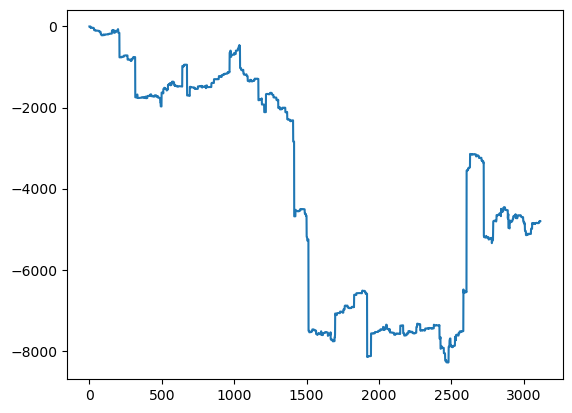

In [95]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/without clustering/daily/SP GLOBAL 100_macd_rsi.png', dpi=300)
plt.show()

In [96]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

In [97]:
returns1,intrade1 = get_returns1(master_macd, master_rsi, prices)

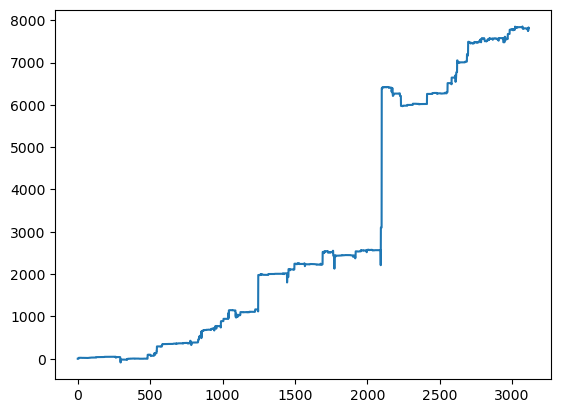

In [98]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/without clustering/daily/SP GLOBAL 100_rsi.png', dpi=300)
plt.show()